### Importing Libraries

In [1]:
import os
from PIL import Image, ImageDraw, ImageFont
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.patches as patches
import numpy as np
from matplotlib import pyplot as plt
import pybboxes as pbx
import xml.etree.cElementTree as et

### Loading Images and Voc Annotations

In [2]:
all_images = []
image_name = []
for x in os.listdir("Images"):
    image_name.append("Images/" + x)
    myimage = cv2.imread("Images/" + x)
    myimage = cv2.cvtColor(myimage, cv2.COLOR_RGB2BGR)
    all_images.append(myimage)

In [3]:
all_annotations = []
annotations_name = []
for x in os.listdir("Annotations"):
    annotations_name.append("Annotations/" + x)
    tree = et.parse("Annotations/" + x)
    root = tree.getroot()
    
    x0, x1, y0, y1 = [], [], [], []
  
    for x in root.iter('object'):
        for y in x.iter('bndbox'):
            for a in y.iter('xmin'):
                x0.append(a.text)
            for b in y.iter('xmax'):
                x1.append(b.text)
            for c in y.iter('ymin'):
                y0.append(c.text)
            for d in y.iter('ymax'):
                y1.append(d.text)
              
    contents = []         
    for i in range(len(x0)):
        contents.append([int(x0[i]),int(y0[i]),int(x1[i]),int(y1[i])])
    all_annotations.append(contents)

### Validating correctness of labels

In [4]:
print(len(all_images))
print(len(all_annotations))

696
696


In [5]:
print(all_images[0].shape)
print(all_annotations[0])

(640, 640, 3)
[[272, 0, 336, 336], [331, 82, 415, 422]]


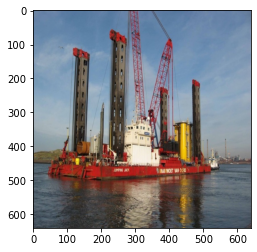

In [6]:
plt.imshow(all_images[0])

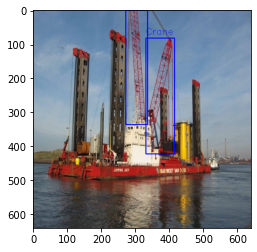

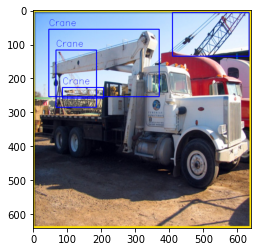

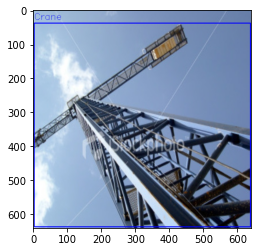

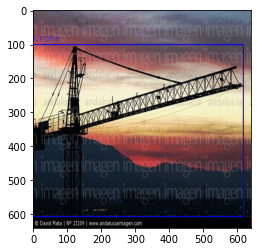

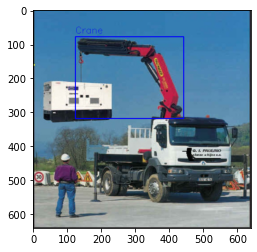

In [7]:
i = 0
for x in range(len(all_images)):
    if i == 5:
        break
    annotations = np.array(all_annotations[x])
    imagecopy =  all_images[x].copy()
    W, H, _ = imagecopy.shape

    for ann in annotations:
        x, y, w, h = ann
        cv2.rectangle(imagecopy, (x, y), (w, h), (0, 0, 255), 2)
        cv2.putText(imagecopy, 'Crane', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 1)
       
    plt.imshow(imagecopy)
    plt.show()
    i+=1

### Changing format from voc to yolo

In [8]:
all_annotations_yolo = []

for x in range(len(all_images)):
    contents = []
    annotations = np.array(all_annotations[x])
    H, W, _ = all_images[x].shape
    for ann in annotations:
        x0,y0,x1,y1 = pbx.convert_bbox(ann, from_type="voc", to_type="yolo", image_size=(W,H))
        contents.append([0,x0,y0,x1,y1])
        
    all_annotations_yolo.append(contents)     

### Loading saved labels and images directories

In [9]:
images = [os.path.join('Images', x) for x in os.listdir('Images')]
annotations = [os.path.join('annotations_Yolo', x) for x in os.listdir('annotations_Yolo') if x[-3:] == "txt"]

In [10]:
images.sort()
annotations.sort()

### Splitting Data to 80% Training, 10% Validation and 10% Testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)

In [13]:
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [14]:
import shutil
def copy_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

### Creating folders and sorting split Data

In [15]:
if not os.path.exists('Training/images/train'):
    os.makedirs('Training/images/train')
if not os.path.exists('Training/images/val/'):
    os.makedirs('Training/images/val/')
if not os.path.exists('Training/images/test/'):
    os.makedirs('Training/images/test/')
if not os.path.exists('Training/labels/train/'):
    os.makedirs('Training/labels/train/')
if not os.path.exists('Training/labels/val/'):
    os.makedirs('Training/labels/val/')
if not os.path.exists('Training/labels/test/'):
    os.makedirs('Training/labels/test/')

In [16]:
copy_files_to_folder(train_images, 'Training/images/train')
copy_files_to_folder(val_images, 'Training/images/val/')
copy_files_to_folder(test_images, 'Training/images/test/')
copy_files_to_folder(train_annotations, 'Training/labels/train/')
copy_files_to_folder(val_annotations, 'Training/labels/val/')
copy_files_to_folder(test_annotations, 'Training/labels/test/')